In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import model_selection, metrics
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
import seaborn as sns
import math
import keras
from time import time
import blaze
from PIL import Image
from skimage.io import imread
import os
import io
import glob
# import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from concurrent.futures import ProcessPoolExecutor
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from skimage.io import imread
from PIL import Image
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
color = sns.color_palette()
%matplotlib inline


import os
print(os.listdir("."))

['train_video_list.zip', 'train_label.zip', '.ipynb_checkpoints', 'EvaluationScriptsAndExamples', 'test.zip', 'test_video_list_and_name_mapping', 'test_video_list_and_name_mapping.zip', 'sk.sh', 'sample_submission.csv', 'list_test_mapping', 'train_label', 'train_color', 'train_color.zip', 'sample_submission.csv.zip', 'EvaluationScriptsAndExamples.zip', 'list_test', 'test', 'Untitled.ipynb']


In [2]:
train_video_list = pd.read_csv('train_video_list.zip', compression='zip', header=0, sep=',', quotechar='"', chunksize=100)
train_label = pd.read_csv('train_label.zip', compression='zip', header=0, sep=',', quotechar='"', chunksize=100)
test = pd.read_csv('test.zip', compression='zip', header=0, sep=',', quotechar='"', chunksize=100)
test_video_list_and_name_mapping = pd.read_csv('test_video_list_and_name_mapping.zip', compression='zip', header=0, sep=',', quotechar='"', chunksize=100)
train_color = pd.read_csv('train_color.zip', compression='zip', header=0, sep=',', quotechar='"', chunksize=100)
EvaluationScriptsAndExamples = pd.read_csv('EvaluationScriptsAndExamples.zip', compression='zip', header=0, sep=',', quotechar='"', chunksize=100)

ValueError: ('Multiple files found in compressed zip file %s', "['road01_cam_5_video_16_image_list_train.txt', 'road01_cam_5_video_18_image_list_train.txt', 'road01_cam_5_video_20_image_list_train.txt', 'road01_cam_6_video_2_image_list_train.txt', 'road01_cam_6_video_4_image_list_train.txt', 'road01_cam_6_video_6_image_list_train.txt', 'road01_cam_6_video_8_image_list_train.txt', 'road01_cam_6_video_10_image_list_train.txt', 'road01_cam_6_video_12_image_list_train.txt', 'road01_cam_6_video_14_image_list_train.txt', 'road01_cam_6_video_16_image_list_train.txt', 'road01_cam_6_video_18_image_list_train.txt', 'road01_cam_6_video_20_image_list_train.txt', 'road02_cam_5_video_2_image_list_train.txt', 'road02_cam_5_video_4_image_list_train.txt', 'road02_cam_5_video_7_image_list_train.txt', 'road02_cam_6_video_2_image_list_train.txt', 'road02_cam_6_video_4_image_list_train.txt', 'road02_cam_6_video_7_image_list_train.txt', 'road03_cam_5_video_1_image_list_train.txt', 'road03_cam_5_video_3_image_list_train.txt', 'road03_cam_5_video_5_image_list_train.txt', 'road03_cam_5_video_7_image_list_train.txt', 'road03_cam_5_video_9_image_list_train.txt', 'road03_cam_5_video_11_image_list_train.txt', 'road03_cam_5_video_13_image_list_train.txt', 'road03_cam_5_video_15_image_list_train.txt', 'road03_cam_5_video_17_image_list_train.txt', 'road03_cam_6_video_1_image_list_train.txt', 'road03_cam_6_video_3_image_list_train.txt', 'road03_cam_6_video_5_image_list_train.txt', 'road03_cam_6_video_7_image_list_train.txt', 'road03_cam_6_video_9_image_list_train.txt', 'road03_cam_6_video_11_image_list_train.txt', 'road03_cam_6_video_13_image_list_train.txt', 'road03_cam_6_video_15_image_list_train.txt', 'road03_cam_6_video_17_image_list_train.txt', 'road01_cam_5_video_2_image_list_train.txt', 'road01_cam_5_video_4_image_list_train.txt', 'road01_cam_5_video_6_image_list_train.txt', 'road01_cam_5_video_8_image_list_train.txt', 'road01_cam_5_video_10_image_list_train.txt', 'road01_cam_5_video_12_image_list_train.txt', 'road01_cam_5_video_14_image_list_train.txt']")

In [11]:
d = pd.DataFrame.from_csv('EvaluationScriptsAndExamples/All_testCases/case10/Case10Solution.csv') 

/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [13]:
d

,InstanceId,PixelCount,EncodedPixels,Usage
ImageId,,,,
47fef111a243f92c3895510e6fef932b,255,9117090,0 5659670|5659671 3380|5663071 3364|5666471 33...,public
47fef111a243f92c3895510e6fef932b,33000,28921,6083407 1|6086789 21|6090172 40|6093554 59|609...,public
47fef111a243f92c3895510e6fef932b,33001,2475,5900149 1|5903532 19|5906915 36|5910298 54|591...,public
47fef111a243f92c3895510e6fef932b,33002,1164,5896666 4|5900050 26|5903434 27|5906818 27|591...,public
47fef111a243f92c3895510e6fef932b,38000,16776,5659670 1|5663051 20|5666435 36|5669819 52|567...,public
47fef111a243f92c3895510e6fef932b,38001,4214,5673175 1|5676558 20|5679942 30|5683325 31|568...,public
dc41b6d853dd47283354e4876b0990c3,255,9112873,0 5666443|5666448 3376|5669843 3362|5673239 33...,public
dc41b6d853dd47283354e4876b0990c3,33000,27791,6056327 48|6059710 51|6063092 54|6066476 56|60...,public
dc41b6d853dd47283354e4876b0990c3,33001,1169,5913591 9|5916972 25|5920355 27|5923738 28|592...,public


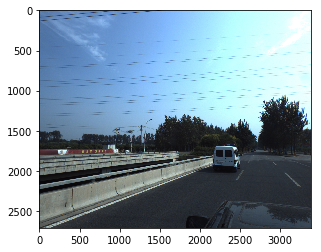

None

In [18]:
im = Image.open("train_color/170908_061523257_Camera_5.jpg")
tlabel = np.asarray(Image.open("train_label/170908_061523257_Camera_5_instanceIds.png")) // 1000
tlabel[tlabel != 0] = 255
# plt.imshow(Image.blend(im, Image.fromarray(tlabel).convert('RGB'), alpha=0.4))
plt.imshow(im)
display(plt.show())

In [23]:
# car, motorcycle, bicycle, pedestrian, truck, bus, and tricycle.
# cutting off everything after class 65, see note below
# classdict = {0:'others', 1:'rover', 17:'sky', 33:'car', 34:'motorbicycle', 35:'bicycle', 36:'person', 37:'rider', 38:'truck', 39:'bus', 40:'tricycle', 49:'road', 50:'siderwalk', 65:'traffic_cone'}
classdict = {0:'others', 33:'car', 34:'motorbicycle', 35:'bicycle', 36:'person', 37:'rider', 38:'truck', 39:'bus', 40:'tricycle', 65:'traffic_cone'}

tlabel = np.asarray(Image.open("train_label/170908_061523257_Camera_5_instanceIds.png"))
cls = np.unique(tlabel)//1000
unique, counts = np.unique(cls, return_counts=True)
d = dict(zip(unique, counts))
df = pd.DataFrame.from_dict(d, orient='index').transpose()
df.rename(columns=classdict, inplace=True)
df

,others,car,tricycle,traffic_cone,bus
0,1,5,1,1,1


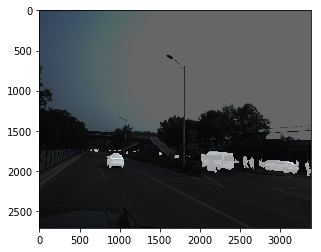

None

,others,car,tricycle,bus
0,1,8,1,1


In [34]:
im = Image.open("train_color/170908_073302618_Camera_6.jpg")
tlabel = np.asarray(Image.open("train_label/170908_073302618_Camera_6_instanceIds.png"))//1000
tlabel[tlabel != 0] = 255
plt.imshow(Image.blend(im, Image.fromarray(tlabel).convert('RGB'), alpha=0.6))

tlabel = np.asarray(Image.open("train_label/170908_061523257_Camera_6_instanceIds.png"))
cls = np.unique(tlabel)//1000
unique, counts = np.unique(cls, return_counts=True)
d = dict(zip(unique, counts))
df = pd.DataFrame.from_dict(d, orient='index').transpose()
df.rename(columns=classdict, inplace=True)

display(plt.show())
df

In [27]:
images_dir = 'train_color'
labels_dir = 'train_label'

In [28]:
# Hoe many samples are there in the training dataset?
train_images = sorted(os.listdir(images_dir))
train_labels = sorted(os.listdir(labels_dir))

print("Number of images and labels in the training data: {}  and {} respectively".format(len(train_images), len(train_labels)))

Number of images and labels in the training data: 39222  and 39222 respectively


In [25]:
# Define the label mappings 
labelmap = {0:'others', 
            1:'rover', 
            17:'sky', 
            33:'car', 
            34:'motorbicycle', 
            35:'bicycle', 
            36:'person', 
            37:'rider', 
            38:'truck', 
            39:'bus', 
            40:'tricycle', 
            49:'road', 
            50:'siderwalk', 
            65:'traffic_cone', 
            66:'road_pile', 
            67:'fence', 
            81:'traffic_light', 
            82:'pole', 
            83:'traffic_sign', 
            84:'wall', 
            85:'dustbin', 
            86:'billboard', 
            97:'building', 
            98:'bridge', 
            99:'tunnel', 
            100:'overpass', 
            113:'vegatation', 
            161:'car_groups', 
            162:'motorbicycle_group', 
            163:'bicycle_group', 
            164:'person_group', 
            165:'rider_group', 
            166:'truck_group', 
            167:'bus_group', 
            168:'tricycle_group'}

In [35]:
# Create an empty dataframe
data_df = pd.DataFrame()
df_list = []

# Iterate over data. I have just shown it for 500 images just to save time 
for idx in range(500):
    # Get the image name and corresponding label
    img_name = train_images[idx]
    label_name = train_labels[idx]
    label = imread(labels_dir / train_labels[idx])
    pixel_classes = np.unique(label//1000)
    classes, instance_count = np.unique(pixel_classes, return_counts=True) # Courtesy:https://www.kaggle.com/jpmiller/cvpr-eda
    data_dict = dict(zip(classes, instance_count))
    df = pd.DataFrame.from_dict(data_dict, orient='index').transpose()
    df.rename(columns=labelmap, inplace=True)
    df['img'] = img_name
    df['label'] = label_name
    
    # Concate to the final dataframe
    #data_df = pd.concat([data_df, df], copy=False)
    # append to the list of intermediate df list
    df_list.append(df)
    
data_df = pd.concat(df_list, axis=0)
del df_list

# Fill the NaN with zero
data_df = data_df.fillna(0)

# Rearrange the columns
cols = data_df.columns.tolist()
cols = [x for x in cols if x not in ['img', 'label']]
cols = ['img', 'label'] + cols
data_df = data_df[cols]

# Display the results
data_df = data_df.reset_index(drop=True)
data_df.head(10)    

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [37]:
!conda install cv2

/home/lazukav/anaconda3/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - cv2

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/free/linux-64
  - https://repo.anaconda.com/pkgs/free/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/pro/linux-64
  - https://repo.anaconda.com/pkgs/pro/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


